In [47]:
import requests

In [48]:
from bs4 import BeautifulSoup

In [49]:
url = 'https://www.pagina12.com.ar'

In [50]:
p12= requests.get(url)

In [51]:
p12.headers

{'Date': 'Tue, 07 Dec 2021 16:41:13 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-ETag': 'W/"6d083-rC1NElwCz9bv2hRpdXygHVcj+Hk"', 'X-Backend': 'frontend', 'X-Type': 'Dynamic URI', 'X-Backend-TTL': '120.000', 'Age': '88', 'grace': '86400.000 none', 'ttl': '31.094', 'X-Instance': 'cache-front-prod-varnish-68cf7d4bd6-cpw9v', 'x-restarts': '0', 'X-Cache': 'hit cached', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '6b9f33410ea2ef0a-MIA', 'Content-Encoding': 'gzip'}

In [52]:
p12.request.method

'GET'

In [53]:
s = BeautifulSoup(p12.text, 'lxml')

In [54]:
print(s.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <meta charset="utf-8"/>
  <title>
   Página12 | La otra mirada
  </title>
  <meta content="x6zSdT0DBcKDmridH4LpEVrCmxcOunR2dgBQVmuL6fg" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <meta content="Notas focalizadas en el quehacer político de la Argentina." name="description" property="description"/>
  <meta content="1541638399393436" name="fb:pages" property="fb:pages"/>
  <meta content="es_AR" name="og:locale" property="og:locale"/>
  <meta content="Página12 | La otra mirada" na

In [55]:
secciones= s.find('ul', attrs ={'class': 'horizontal-list main-sections hide-on-dropdown'}).find_all('li')
secciones

[<li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/economia">Economía</a></li>,
 <li class="p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/sociedad">Sociedad</a></li>,
 <li class="no-separator-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos">Cultura y Espectáculos</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/deportes">Deportes</a></li>,
 <li class="hide-on-1040 p12-separator--right--primary"><a href="https://www.pagina12.com.ar/secciones/el-mundo">El mundo</a></li>,
 <li class="hide-on-1040"><a href="https://www.pagina12.com.ar/secciones/plastica">Plástica</a></li>]

In [56]:
seccion = secciones[0]

In [57]:
seccion.a.get('href')

'https://www.pagina12.com.ar/secciones/el-pais'

In [58]:
links_secciones= [seccion.a.get('href') for seccion in secciones]

In [59]:
links_secciones

['https://www.pagina12.com.ar/secciones/el-pais',
 'https://www.pagina12.com.ar/secciones/economia',
 'https://www.pagina12.com.ar/secciones/sociedad',
 'https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos',
 'https://www.pagina12.com.ar/secciones/deportes',
 'https://www.pagina12.com.ar/secciones/el-mundo',
 'https://www.pagina12.com.ar/secciones/plastica']

In [60]:
sec = requests.get(links_secciones[0])

In [61]:
s_seccion = BeautifulSoup(sec.text, 'lxml')

In [62]:
print(s_seccion.prettify())

<!DOCTYPE html>
<html amp="" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   El país | Página12
  </title>
  <!-- DUST PATH: /usr/src/app/src/widgets/fc_jsonLD.dust/ -->
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "Organization","name": "Página12","url": "https://www.pagina12.com.ar","logo": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/logo_default_p12.png","width": "600","height": "60"},"sameAs":["https://twitter.com/pagina12","https://www.youtube.com/channel/UCJNDedOnljCssaiRZqg8-Dg","https://www.instagram.com/pagina12/","https://www.facebook.com/Pagina12ok/"]}
  </script>
  <script type="application/ld+json">
   {"@context": "http://schema.org","@type": "NewsArticle","mainEntityOfPage": {"@type": "WebPage","@id": "https://www.pagina12.com.ar/secciones/el-pais"},"headline": "El país | Página12","isAccessibleForFree": "False","image": {"@type": "ImageObject","url": "https://www.pagina12.com.ar/assets/media/lo

In [63]:
featured_article = s_seccion.find('div', attrs={'class':'article-item__content-footer-wrapper gutter-small deco-bar-here-left is-mobile-top'})
featured_article

<div class="article-item__content-footer-wrapper gutter-small deco-bar-here-left is-mobile-top"><div class="article-item__content"><!-- Title --><h2 class="title-list"><a href="/387750-hugo-sigman-presento-una-millonaria-demanda-contra-patricia-">Hugo Sigman presentó una millonaria demanda contra Patricia Bullrich por su campaña contra las vacunas Pfizer</a></h2><!-- Kicker --><p><a href="/387750-hugo-sigman-presento-una-millonaria-demanda-contra-patricia-">El dinero será donado al Hospital Gutiérrez</a></p></div><div class="article-item__footer"><!-- Author --><!-- Date --><div class="date hide-on-mobile">07 de diciembre de 2021</div><!-- Author Mobile --><!-- Date Mobile --><div class="date is-display-inline hide-on-desktop">07 de diciembre de 2021</div></div></div>

In [64]:
promocional= url + featured_article.a.get('href')

In [65]:
promocional

'https://www.pagina12.com.ar/387750-hugo-sigman-presento-una-millonaria-demanda-contra-patricia-'

In [66]:
def obtener_notas(soup):
    lista_notas = []
    
    #Articulo promocionado
    featured_article = soup.find('section',attrs={'class':'top-content'})
    if featured_article:
        lista_notas.append(url+ featured_article.a.get('href'))
        
    #Listado de articulos TOP
    article_list_top = soup.find('section', attrs = {'class':'list-content'}).find_all('h3')
    for article in article_list_top:
        if article.a:
            lista_notas.append(url+ article.a.get('href'))
    
    #Listado de articulos SUB
    article_list_sub = s_seccion.find('section', attrs = {'class':'list-content'}).find_all('h4')
    for article in article_list_sub:
        if article.a:
            lista_notas.append(url+article.a.get('href'))
    
    return lista_notas

In [67]:
lista_notas = obtener_notas(s_seccion)
lista_notas

['https://www.pagina12.com.ar/387750-hugo-sigman-presento-una-millonaria-demanda-contra-patricia-',
 'https://www.pagina12.com.ar/387748-fabiola-yanez-volvio-a-visitar-el-comedor-esperanza-kilme-y-',
 'https://www.pagina12.com.ar/387744-la-camara-baja-elige-a-sus-autoridades-y-toma-juramento-a-la',
 'https://www.pagina12.com.ar/387739-nuevo-pescadazo-en-el-congreso-para-pedirle-al-gobierno-poli',
 'https://www.pagina12.com.ar/387722-la-primera-reunion-de-soria-con-la-corte-suprema-incluyo-fue',
 'https://www.pagina12.com.ar/387720-como-fue-el-violento-desalojo-de-cooperativa-nueva-generacio',
 'https://www.pagina12.com.ar/387709-alberto-fernandez-prorrogo-por-seis-meses-la-intervencion-de',
 'https://www.pagina12.com.ar/387703-un-youtuber-va-a-juicio-oral-por-hostigar-y-discriminar-a-la',
 'https://www.pagina12.com.ar/387701-quienes-son-los-nuevos-diputados-de-tolosa-paz-a-javier-mile',
 'https://www.pagina12.com.ar/387694-provincia-de-buenos-aires-alberto-sileoni-reemplazaria-a-agu',


In [68]:
r = requests.get(url)

In [69]:
r.status_code

200

In [70]:
try:
    requests.get(url)
except Exception as e:
    print('error en la request')
    print(e)
    print('\n')                                                                 

In [71]:
url_nota= lista_notas[0]

In [72]:
url_nota

'https://www.pagina12.com.ar/387750-hugo-sigman-presento-una-millonaria-demanda-contra-patricia-'

In [73]:
try:
    nota  = requests.get(url_nota)
    if nota.status_code==200:
        s_nota = BeautifulSoup(nota.text, 'lxml')
        #Extraemos el titulo
        titulo = s_nota.find('div', attrs={'class': 'col 2-col'})
        print(titulo.h1.text)
        # Extraer la fecha
        fecha = s_nota.find('span', attrs={'class': 'p12-separator--right--gray'})
        print(fecha.text)
        # Extraer copete
        copete = s_nota.find('div', attrs={'class': 'col 2-col'})
        print(copete.h3.text)
        # Extraer  Volanta
        volanta = s_nota.find('div', attrs={'class': 'col 2-col'})
        print(volanta.h4.text)
        # autor
        autor = s_nota.find('div', attrs={'class': 'author-name'})
        print(autor.text)
        #Extraer cuerpo
        cuerpo = s_nota.find('div', attrs={'class': 'article-main-content article-text'})
        print(cuerpo.text)

except Exception as e:
    print('Error')
    print(e)
    print('\n')

Hugo Sigman presentó una millonaria demanda contra Patricia Bullrich por su campaña contra las vacunas Pfizer
07 de diciembre de 2021

El dinero será donado al Hospital Gutiérrez
Error
'NoneType' object has no attribute 'text'




In [74]:
media = s_nota.find('div', attrs={'class': 'article-main-media-image__container'})

In [75]:
imagenes= media.find_all('img')
imagenes

[<img alt='Hugo Sigman afirmó que Patricia Bullrich encabezó un "plan sistemático de desprestigio" en su contra' class="" src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-12/295617-whatsapp-20image-202021-12-07-20at-2012-30-10.jpeg?itok=OygKYo9f"/>]

In [76]:
if len(imagenes) == 0:
    print('No se encontraron imagenes')
else:
    imagen = imagenes[-1]
    img_src = imagen.get('src')
    print(img_src)

https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-12/295617-whatsapp-20image-202021-12-07-20at-2012-30-10.jpeg?itok=OygKYo9f


In [77]:
img_req= requests.get(img_src)

In [78]:
img_req.status_code

200

In [79]:
from IPython.display import Image

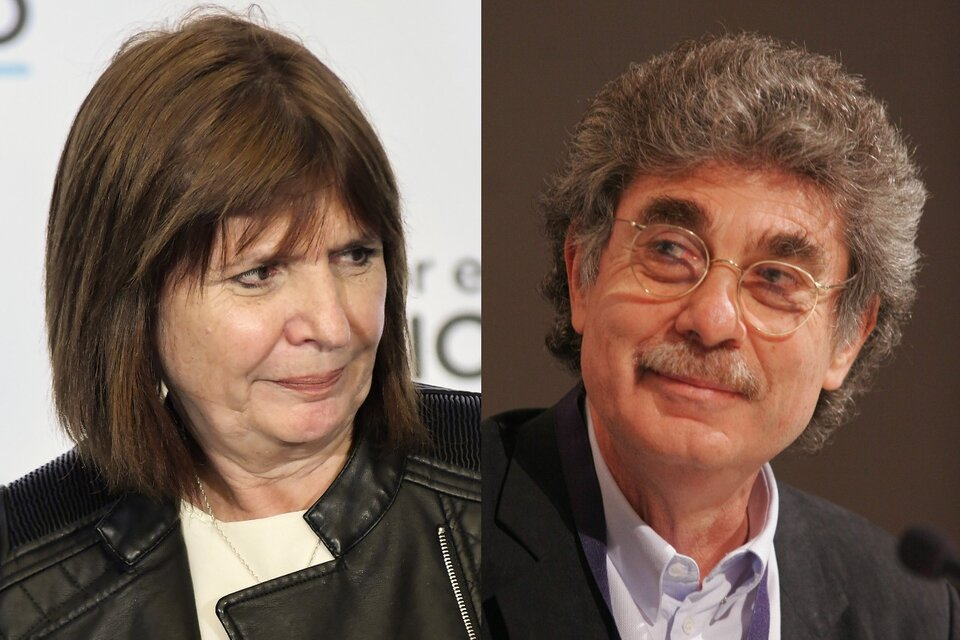

In [80]:
Image(img_req.content) 

##  Unificando Scrapper

In [92]:

def obtener_info(s_nota):

    #Creamos un diccionario vacio para poblarlo con la informacion
    ret_dict =  {}

    #extraemos la fecha
    fecha = s_nota.find('span', attrs={'class': 'p12-separator--right--gray'})
    if fecha:
        ret_dict['fecha'] = fecha.text
    else:
        ret_dict['fecha']= None
    
    # Extaemos el  titulo
    titulo = s_nota.find('div', attrs={'class': 'col 2-col'})
    if titulo:
        ret_dict['titulo'] = titulo.text
    else:
        ret_dict['titulo']= None

    # Extraemos la volanta
    volanta = s_nota.find('div', attrs={'class': 'col 2-col'})
    if volanta:
        ret_dict['volanta'] = volanta.h4.text
    else:
        ret_dict['volanta']= None
    
    #Extraer copete
    copete = s_nota.find('div', attrs={'class': 'col 2-col'})
    if copete:
        ret_dict['copete'] = copete.h3.text
    else:
        ret_dict['copete']= None

    #Extraer autor
    autor = s_nota.find('div', attrs={'class': 'author-name'})
    if autor:
        ret_dict['autor'] = autor.text
    else:
        ret_dict['autor'] =  None
    
    #extraemos imagen
    media = s_nota.find('div', attrs={'class': 'article-main-media-image__container'})
    if  media:
        imagenes= media.find_all('img')
        if len(imagenes) == 0:
            print('No se encontraron imagenes')
        else:
            imagen = imagenes[-1]
            img_src = imagen.get('src')
            try:
                img_req= requests.get(img_src)
                if img_req.status_code ==200:
                    ret_dict['imagen']=Image(img_req.content) 
                else:
                    ret_dict['imagen'] = None

            except:
                print('No se encontro imagen')
    else:
        print('No se encontro media')
    
    # Extraemos el cuerpo de la nota
    cuerpo = s_nota.find('div', attrs={'class': 'article-main-content article-text'})
    if cuerpo:
        ret_dict['cuerpo'] = cuerpo.text
    else:
        ret_dict['cuerpo']= None
                
                

    

    

    return  ret_dict


In [94]:
def scrape_nota(url):
    try:
        nota =  requests.get(url)
    except Exception as e:
        print('error scrapeado url', url)
        print(e)
        return None


    if  nota.status_code  !=200:
        print(f'error obtenido nota {url}')
        print(f'status code={nota.status_code}')
        return None
    s_nota = BeautifulSoup(nota.text, 'lxml')

    ret_dict = obtener_info(s_nota)
    ret_dict['url']=  url

    return ret_dict

In [95]:
scrape_nota(url_nota)

{'fecha': '07 de diciembre de 2021',
 'titulo': 'El dinero será donado al Hospital GutiérrezHugo Sigman presentó una millonaria demanda contra Patricia Bullrich por su campaña contra las vacunas Pfizer',
 'volanta': 'El dinero será donado al Hospital Gutiérrez',
 'copete': '',
 'autor': None,
 'imagen': <IPython.core.display.Image object>,
 'cuerpo': 'El empresario argentino Hugo Sigman, del Grupo Insud, demandó por 20 millones de pesos (que prometió donar a un hospital público) a la ex ministra de Seguridad Patricia Bullrich por haber declarado en medios de comunicación y redes sociales que era un intermediario para el pago de "retornos" del laboratorio Pfizer para la compra de vacunas contra el coronavirus. Sigman inició la demanda civil en procura de "la indemnización de los daños y perjuicios sufridos por el suscripto como consecuencia de las infundadas, ilegítimas y agraviantes manifestaciones públicas formuladas por ella ante distintos medios de comunicación y en las redes social

In [96]:
notas = []
for link in links_secciones:
    try:
        r =requests.get(link)
        if r.status_code ==200:
            soup = BeautifulSoup(r.text, 'lxml')
            notas.extend(obtener_notas(soup))
        else:
            print('Nose pudo obtener la seccion', link)
    except:
        print('Nose pudo obtener la seccion', link)

Nose pudo obtener la seccion https://www.pagina12.com.ar/suplementos/cultura-y-espectaculos


In [97]:
notas

['https://www.pagina12.com.ar/387760-soria-le-dijo-a-la-corte-que-argentina-podria-ser-sancionada',
 'https://www.pagina12.com.ar/387750-hugo-sigman-presento-una-millonaria-demanda-contra-patricia-',
 'https://www.pagina12.com.ar/387748-fabiola-yanez-volvio-a-visitar-el-comedor-esperanza-kilme-y-',
 'https://www.pagina12.com.ar/387739-nuevo-pescadazo-en-el-congreso-para-pedirle-al-gobierno-poli',
 'https://www.pagina12.com.ar/387722-la-primera-reunion-de-soria-con-la-corte-suprema-incluyo-fue',
 'https://www.pagina12.com.ar/387720-como-fue-el-violento-desalojo-de-cooperativa-nueva-generacio',
 'https://www.pagina12.com.ar/387709-alberto-fernandez-prorrogo-por-seis-meses-la-intervencion-de',
 'https://www.pagina12.com.ar/387703-un-youtuber-va-a-juicio-oral-por-hostigar-y-discriminar-a-la',
 'https://www.pagina12.com.ar/387701-quienes-son-los-nuevos-diputados-de-tolosa-paz-a-javier-mile',
 'https://www.pagina12.com.ar/387694-provincia-de-buenos-aires-alberto-sileoni-reemplazaria-a-agu',


In [98]:
data = []
for i, nota in enumerate(notas):
    print(f'Scrapeando nota{i}/{len(notas)}')
    data.append(scrape_nota(nota))

Scrapeando nota0/66
Scrapeando nota1/66
Scrapeando nota2/66
Scrapeando nota3/66
Scrapeando nota4/66
Scrapeando nota5/66
Scrapeando nota6/66
Scrapeando nota7/66
Scrapeando nota8/66
Scrapeando nota9/66
Scrapeando nota10/66
Scrapeando nota11/66
Scrapeando nota12/66
Scrapeando nota13/66
Scrapeando nota14/66
Scrapeando nota15/66
Scrapeando nota16/66
Scrapeando nota17/66
Scrapeando nota18/66
Scrapeando nota19/66
Scrapeando nota20/66
Scrapeando nota21/66
Scrapeando nota22/66
Scrapeando nota23/66
Scrapeando nota24/66
Scrapeando nota25/66
Scrapeando nota26/66
Scrapeando nota27/66
Scrapeando nota28/66
Scrapeando nota29/66
Scrapeando nota30/66
Scrapeando nota31/66
Scrapeando nota32/66
Scrapeando nota33/66
Scrapeando nota34/66
Scrapeando nota35/66
Scrapeando nota36/66
Scrapeando nota37/66
Scrapeando nota38/66
Scrapeando nota39/66
Scrapeando nota40/66
Scrapeando nota41/66
Scrapeando nota42/66
Scrapeando nota43/66
Scrapeando nota44/66
Scrapeando nota45/66
Scrapeando nota46/66
Scrapeando nota47/66
Sc

In [99]:
len(data)

66

In [101]:
import pandas as pd

In [102]:
df =  pd.DataFrame(data)

In [103]:
df.head()

,fecha,titulo,volanta,copete,autor,imagen,cuerpo,url
0,07 de diciembre de 2021,“Se demoran causas que debieran tener priorida...,“Se demoran causas que debieran tener priorida...,Una muestra de la indiferencia de los cortesan...,Por Luciana Bertoia,<IPython.core.display.Image object>,"En su primera reunión en la Corte Suprema, el ...",https://www.pagina12.com.ar/387760-soria-le-di...
1,07 de diciembre de 2021,El dinero será donado al Hospital GutiérrezHug...,El dinero será donado al Hospital Gutiérrez,,None,<IPython.core.display.Image object>,"El empresario argentino Hugo Sigman, del Grupo...",https://www.pagina12.com.ar/387750-hugo-sigman...
2,07 de diciembre de 2021,La Fundación Banco Nación colaboró en el 2020 ...,La Fundación Banco Nación colaboró en el 2020 ...,,None,<IPython.core.display.Image object>,"En 2020, Fabiola Yáñez acompañó al comedor Esp...",https://www.pagina12.com.ar/387748-fabiola-yan...
3,07 de diciembre de 2021,"""Nuestra situación es gravísima"", dijeron a Pá...","""Nuestra situación es gravísima"", dijeron a Pá...",Los pescadores artesanales ya no saben qué hac...,Por Laura Vales,<IPython.core.display.Image object>,"Con un nuevo pescadazo en el Congreso, coopera...",https://www.pagina12.com.ar/387739-nuevo-pesca...
4,07 de diciembre de 2021,“Vinimos a expresar nuestra preocupación por l...,“Vinimos a expresar nuestra preocupación por l...,"Les reprochó demorar causas urgentes, habló de...",None,<IPython.core.display.Image object>,"El ministro de Justicia, Martín Soria, mantuvo...",https://www.pagina12.com.ar/387722-la-primera-...


In [105]:
df.to_csv('Notas Pagina12.csv')